# Ecommerce Purchases Data via Kaggle

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import re

Dataset : https://www.kaggle.com/datasets/utkarsharya/ecommerce-purchases

In [2]:
df=pd.read_csv("Ecommerce Purchases")

In [3]:
df.head().T

,0,1,2,3,4
Address,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...","9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",Unit 0065 Box 5052\nDPO AP 27450,"7780 Julia Fords\nNew Stacy, WA 45798","23012 Munoz Drive Suite 337\nNew Cynthia, TX 5..."
Lot,46 in,28 rn,94 vE,36 vm,20 IE
AM or PM,PM,PM,PM,PM,AM
Browser Info,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...
Company,Martinez-Herman,"Fletcher, Richards and Whitaker","Simpson, Williams and Pham","Williams, Marshall and Buchanan","Brown, Watson and Andrews"
Credit Card,6011929061123406,3337758169645356,675957666125,6011578504430710,6011456623207998
CC Exp Date,02/20,11/18,08/19,02/24,10/25
CC Security Code,900,561,699,384,678
CC Provider,JCB 16 digit,Mastercard,JCB 16 digit,Discover,Diners Club / Carte Blanche
Email,pdunlap@yahoo.com,anthony41@reed.com,amymiller@morales-harrison.com,brent16@olson-robinson.info,christopherwright@gmail.com


# 1) How does the data look?

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Address,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...","9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",Unit 0065 Box 5052\nDPO AP 27450,"7780 Julia Fords\nNew Stacy, WA 45798","23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...","7502 Powell Mission Apt. 768\nTravisland, VA 3...","93971 Conway Causeway\nAndersonburgh, AZ 75107","260 Rachel Plains Suite 366\nCastroberg, WV 24...","2129 Dylan Burg\nNew Michelle, ME 28650","3795 Dawson Extensions\nLake Tinafort, ID 88739"
Lot,46 in,28 rn,94 vE,36 vm,20 IE,21 XT,96 Xt,96 pG,45 JN,15 Ug
AM or PM,PM,PM,PM,PM,AM,PM,AM,PM,PM,AM
Browser Info,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_5...,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Mozilla/5.0 (X11; Linux i686) AppleWebKit/5350...,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...
Company,Martinez-Herman,"Fletcher, Richards and Whitaker","Simpson, Williams and Pham","Williams, Marshall and Buchanan","Brown, Watson and Andrews",Silva-Anderson,Gibson and Sons,Marshall-Collins,Galloway and Sons,"Rivera, Buchanan and Ramirez"
Credit Card,6011929061123406,3337758169645356,675957666125,6011578504430710,6011456623207998,30246185196287,6011398782655569,561252141909,180041795790001,4396283918371
CC Exp Date,02/20,11/18,08/19,02/24,10/25,07/25,07/24,06/25,04/24,01/17
CC Security Code,900,561,699,384,678,7169,714,256,899,931
CC Provider,JCB 16 digit,Mastercard,JCB 16 digit,Discover,Diners Club / Carte Blanche,Discover,VISA 16 digit,VISA 13 digit,JCB 16 digit,American Express
Email,pdunlap@yahoo.com,anthony41@reed.com,amymiller@morales-harrison.com,brent16@olson-robinson.info,christopherwright@gmail.com,ynguyen@gmail.com,olivia04@yahoo.com,phillip48@parks.info,kdavis@rasmussen.com,qcoleman@hunt-huerta.com


In [5]:
df.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

# 2) Credit Card

In [6]:
df["Credit Card"].nunique()==df.shape[0]

True

**As you already know the higher the number of unique rows, the harder it is for machine learning. That's why I'll drop this column**

In [7]:
df.drop("Credit Card", axis=1, inplace=True)

# 3) How is the distribution of "Purchase Price " by Browser?

In [8]:
df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'CC Exp Date',
       'CC Security Code', 'CC Provider', 'Email', 'Job', 'IP Address',
       'Language', 'Purchase Price'],
      dtype='object')

In [8]:
df["Browser Info"]=df["Browser Info"].str.split("/").str[0]

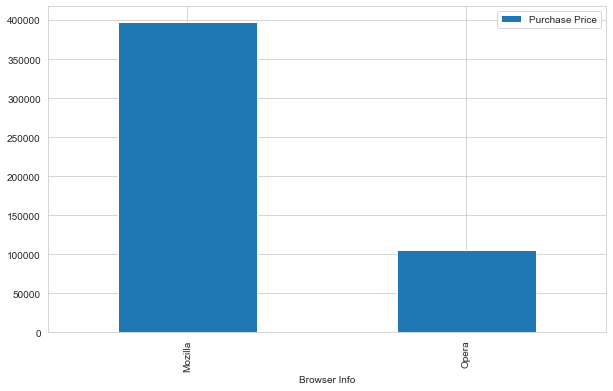

In [9]:
df.groupby("Browser Info")[["Purchase Price"]].sum().plot(kind="bar");

# 4) How is the distribution of "Purchase Price	" by part of day?

In [10]:
df.groupby("AM or PM")[["Purchase Price"]].sum()

,Purchase Price
AM or PM,
AM,247519.87
PM,255953.15


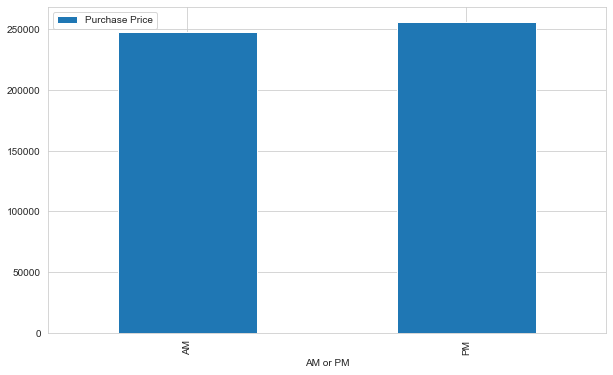

In [11]:
df.groupby("AM or PM")[["Purchase Price"]].sum().plot(kind="bar");

In [12]:
df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'CC Exp Date',
       'CC Security Code', 'CC Provider', 'Email', 'Job', 'IP Address',
       'Language', 'Purchase Price'],
      dtype='object')

# 5) How is the distribution of "Purchase Price	" by Language?

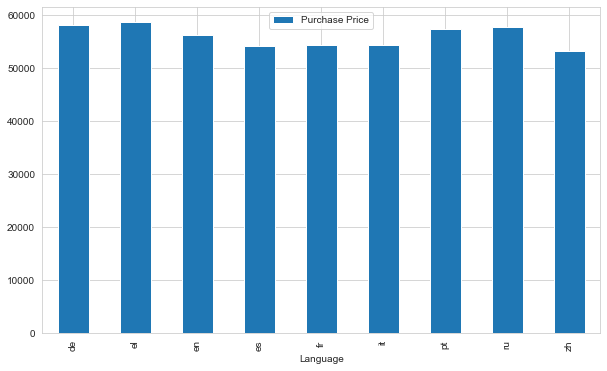

In [13]:
df.groupby("Language")[["Purchase Price"]].sum().plot(kind="bar");

# 6) How is the distribution of "Purchase Price	" by Jobs?

In [14]:
def func(x):
    if x.contains("artist"):
        return "Artist"
    elif x.str.contains("engineer"):
        return "Engineer"
    elif x.str.contains("journalist"):
        return "Journalist"
    elif x.str.contains("designer"):
        return "Designert"
    elif x.str.contains("researcher"):
        return "Researcher"
    elif x.str.contains("teacher"):
        return "Teachert"
    elif x.str.contains("manager"):
        return "Manager"
    else:
        return "Others"
    

In [15]:
def func1(x):
    if "artist" in x:
        return "Artist"
    elif "engineer" in x:
        return "Engineer"
    elif "journalist" in x:
        return "Journalist"
    elif "designer" in x:
        return "Designer"
    elif "researche" in x:
        return "Researche"
    elif "teacher" in x:
        return "Teacher"
    elif "manager" in x:
        return "Manager"
    elif "Scientist" in x:
        return "Scientist"
    else:
        return "Others"

In [16]:
df["Job-Title"]=df["Job"].apply(func1)

In [17]:
df

,Address,Lot,AM or PM,Browser Info,Company,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Job-Title
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera,Martinez-Herman,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Scientist
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera,"Fletcher, Richards and Whitaker",11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Engineer
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla,"Simpson, Williams and Pham",08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Manager
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla,"Williams, Marshall and Buchanan",02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Engineer
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera,"Brown, Watson and Andrews",10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Artist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla,Randall-Sloan,03/22,838,JCB 15 digit,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21,Others
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla,"Hale, Collins and Wilson",07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63,Engineer
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla,Anderson Ltd,05/21,1,VISA 16 digit,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98,Others
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla,Cook Inc,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84,Others


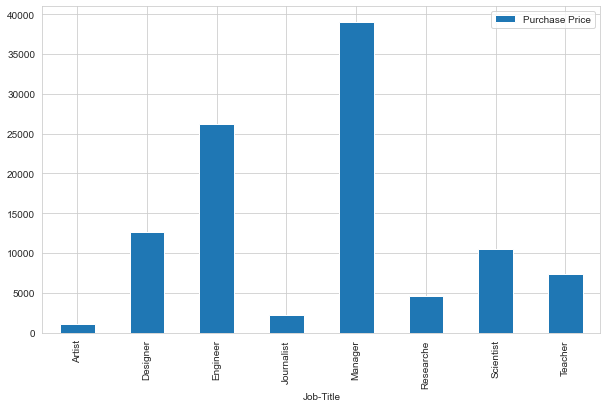

In [18]:
df[df["Job-Title"]!="Others"].groupby("Job-Title")[["Purchase Price"]].sum().plot(kind="bar");

# 7) How is the distribution of "Purchase Price	" by  CC Provider ?

In [19]:
df["CC Provider"]

0                      JCB 16 digit
1                        Mastercard
2                      JCB 16 digit
3                          Discover
4       Diners Club / Carte Blanche
                   ...             
9995                   JCB 15 digit
9996                   JCB 16 digit
9997                  VISA 16 digit
9998               American Express
9999                   JCB 15 digit
Name: CC Provider, Length: 10000, dtype: object

In [20]:
df["CC Provider"] = df["CC Provider"].str.split(" ").str[0]

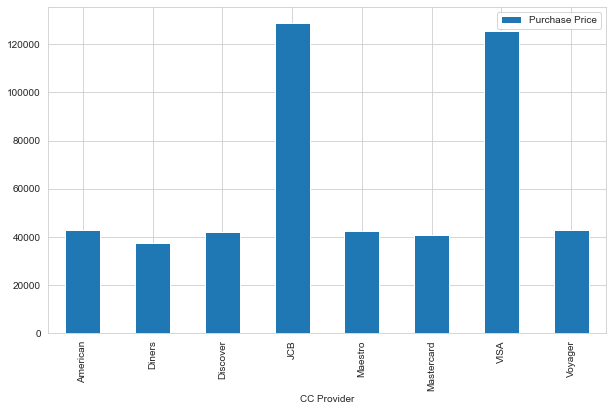

In [21]:
df.groupby("CC Provider")[["Purchase Price"]].sum().plot(kind="bar");

# 8) How is the distribution of "Purchase Price	" by  Mail-Adresse?

In [22]:
df["Email"]=df["Email"].str.split("@").str[1].str.split(".").str[0]

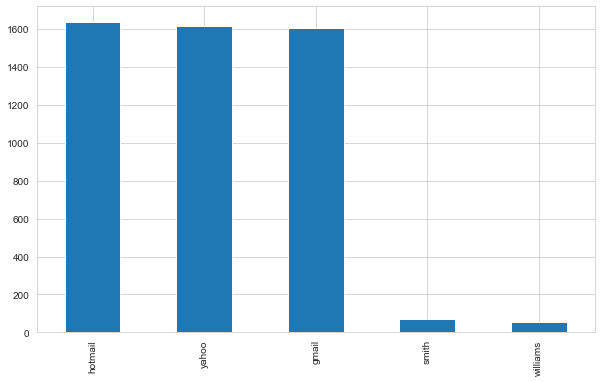

In [23]:
df["Email"].value_counts(dropna=False).sort_values(ascending=False).head(5).plot(kind="bar");

# 9) How is the distribution of "Purchase Price " by Years?

In [24]:
df["Year"]=df["CC Exp Date"].str.split("/").str[1]

In [25]:
df["Month"]=df["CC Exp Date"].str.split("/").str[0]

In [26]:
df.drop("CC Exp Date",axis=1,inplace=True)

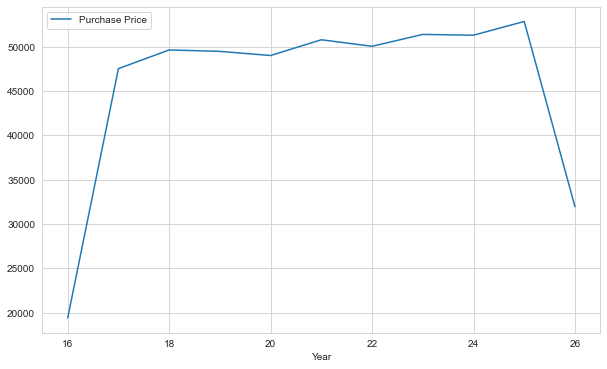

In [28]:
df.groupby("Year")[["Purchase Price"]].sum().plot();